# Assignment: Unsupervised Machine Learning \ Clustering

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrogram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [3]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

In [4]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

array([[0., 1., 1., 2.],
       [3., 4., 2., 2.],
       [6., 7., 3., 4.],
       [2., 8., 4., 5.],
       [5., 9., 5., 6.]])

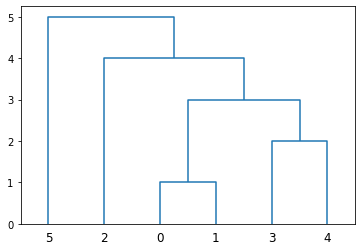

In [5]:
#My own Notes:
lnk = hierarchy.linkage(squareform(d), 'complete')
hierarchy.dendrogram(lnk, color_threshold=0)
lnk

Notes on How the Z Graph Matrix and the Dendrogram work:
Dendrogram: The order of the clustering is from lowest bar to highest. So above, 0 and 1 were clustered together first, followed by 3 and 4. The clusters are made in order of distance to each other. Those with the lowest distance to each other are up next in the clustering hierarchy.

Here, there originally were 6 clusters (0-5). Every time we create a new cluster, a new index gets created indicating a new cluster. So once 0 and one were joined, a new cluster #6 was created (consisting of clusters 0 and 1). Then when 3 and 4 are clustered in the following interation, cluster #7 is created (consisting of clusters 3 and 4).

In the Z matrix: 

Each row indicates a new iteration. So if n = original amount of clusters (0-5), there will be n-1 rows (iterations, = 5). 

Z[ i, 0 ] = cluster 'a' being joined to cluster 'b' (In the first row above, cluster 0 joins with cluster 1.  **Note**, that in the third iteration, there is a new cluster 6. 
                                                    This 6 is the cluster created in the first iteration (and 7 is the second cluster created.))

Z[ i, 1 ] = cluster 'b' being joined by cluster 'a'  (in the first row above, cluster 1 being joined by cluster 0)

Z[ i , 2] = distance between the two clusters being joined (the distance between them is 1, which is also their height in the dendrogram)

Z[ i , 3] = number of original observations in the **newly** formed cluster (in the first row above, the value is 2 because there are now 2 clusters in the new cluster: 0 and 1)


[[0. 1. 1. 2.]
 [3. 6. 2. 3.]
 [4. 7. 2. 4.]
 [2. 8. 2. 5.]
 [5. 9. 2. 6.]]
[[0. 1. 1. 2.]
 [3. 4. 2. 2.]
 [6. 7. 3. 4.]
 [2. 8. 4. 5.]
 [5. 9. 5. 6.]]
[[0.  1.  1.  2. ]
 [3.  4.  2.  2. ]
 [2.  7.  2.5 3. ]
 [6.  8.  3.  5. ]
 [5.  9.  4.  6. ]]
[[0.         1.         1.         2.        ]
 [3.         4.         2.         2.        ]
 [2.         7.         2.7080128  3.        ]
 [5.         6.         3.60555128 3.        ]
 [8.         9.         5.29150262 6.        ]]


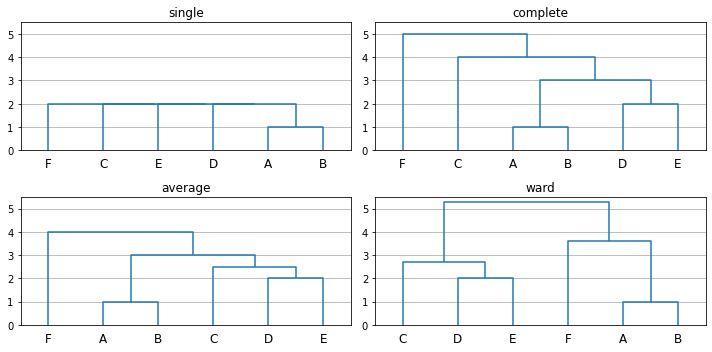

In [6]:
methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    print(lnk)
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [7]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [8]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

In [9]:
d1

array([[0., 1., 1., 5., 5.],
       [1., 0., 3., 5., 5.],
       [1., 3., 0., 3., 1.],
       [5., 5., 3., 0., 1.],
       [5., 5., 1., 1., 0.]])

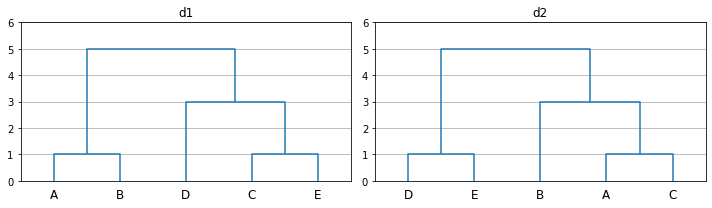

In [10]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

## Challenge 1.1 (_max score - 20 points_)
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your tasks:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be applied on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean).
3. Repeat the above process (previus cell) to plot the results

In [11]:
unified = np.append(np.array(squareform(d1)),np.array(squareform(d2)))
kmeans = KMeans(4, random_state = 0).fit(unified.reshape(-1,1))
clean = kmeans.cluster_centers_

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  


C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  


The distance between the matrices is 0.0


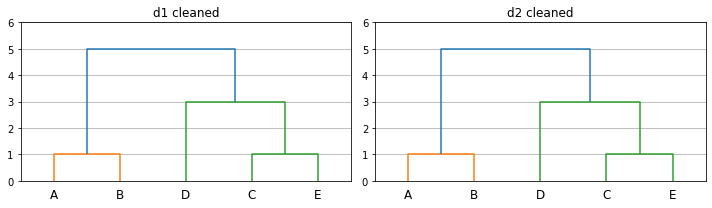

In [12]:
unified = np.append(np.array(squareform(d1)),np.array(squareform(d2)))
kmeans = KMeans(n_clusters=4, random_state=0).fit(unified.reshape(-1,1))
clean = kmeans.cluster_centers_.flatten()[kmeans.labels_] #confused how this broadcasting works. Also, we don't want there to be 0's?

d1_new = clean[:10] # Fixing d1
d2_new = clean[10:] # Fixing d2
print("The distance between the matrices is",np.sqrt(np.sum((d1_new-d2_new)**2)))


plt.figure(figsize=(10, 3))

for i, d in enumerate([squareform(d1_new), squareform(d2_new)]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s cleaned' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete')  
    hierarchy.dendrogram(lnk, labels=['A', 'B', 'C', 'D', 'E'])

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

We will use here data from the 18th Kneset elections. https://en.wikipedia.org/wiki/2009_Israeli_legislative_election


In [13]:
df = pd.read_csv('Elections.csv')

# Show first 10 rows
print(df.shape)
df[:30]

(1156, 41)


,TownNumber,TownName,Potential,TotalVotes,PercentVote,Qualified,Disqualified,Avoda,Or,BaitYehudi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
0,5000,תל אביב - יפו,383990,226390,58.96,224000,2390,34095,77,3417,...,36,41,42,273,198,1003,50,41,1081,14412
1,3000,ירושלים,353784,217905,61.59,215743,2162,12355,38,8944,...,26,19,23,147,64,434,26,39,445,32624
2,4000,חיפה,235198,136506,58.04,134710,1796,17279,43,3431,...,13,29,67,218,89,485,41,37,467,4117
3,8300,ראשון לציון,182953,117147,64.03,115839,1308,12647,25,2451,...,22,22,24,238,63,454,30,30,580,6784
4,7900,פתח תקווה,155678,100123,64.31,98905,1218,8661,20,6043,...,19,16,21,90,45,330,41,32,341,8061
5,70,אשדוד,156977,96363,61.39,94776,1587,4176,23,1399,...,14,31,26,139,93,294,27,103,212,14065
6,6600,חולון,149023,88202,59.19,86962,1240,9439,22,1409,...,21,24,20,129,55,326,25,24,344,9250
7,7400,נתניה,150183,82783,55.12,81367,1416,5928,33,3462,...,22,35,43,113,68,285,23,45,302,8837
8,9000,באר שבע,148214,79215,53.45,77853,1362,5577,19,1608,...,17,29,16,109,69,227,27,41,189,8491
9,8600,רמת גן,119271,75684,63.46,74932,752,11023,32,2185,...,11,22,21,95,27,293,18,17,452,3709


In [14]:
party_names = list(df.columns)[7:]
print(party_names)

['Avoda', 'Or', 'BaitYehudi', 'YahadutHatora', 'Balad', 'MeimadYarukim', 'Hadash', 'Gimlaim', 'EfraimSne', 'IhudLeumi', 'Israelim', 'Lev', 'NizolimAndAle', 'Kadima', 'IsraelBeytenu', 'Likud', 'Merez', 'Nudelman', 'RuahHadasha', 'Lazuz', 'LojmeiHevra', 'Raam', 'Koah', 'Koah.1', 'Brit', 'Gever', 'Zomet', 'Zabar', 'Daam', 'AleYarok', 'Koah.2', 'Lidar', 'Yarok', 'Shas']


In [15]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 34)) #34 is len(party names)
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                        # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))
x = pd.DataFrame(x,columns=party_names)

In [16]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'average')

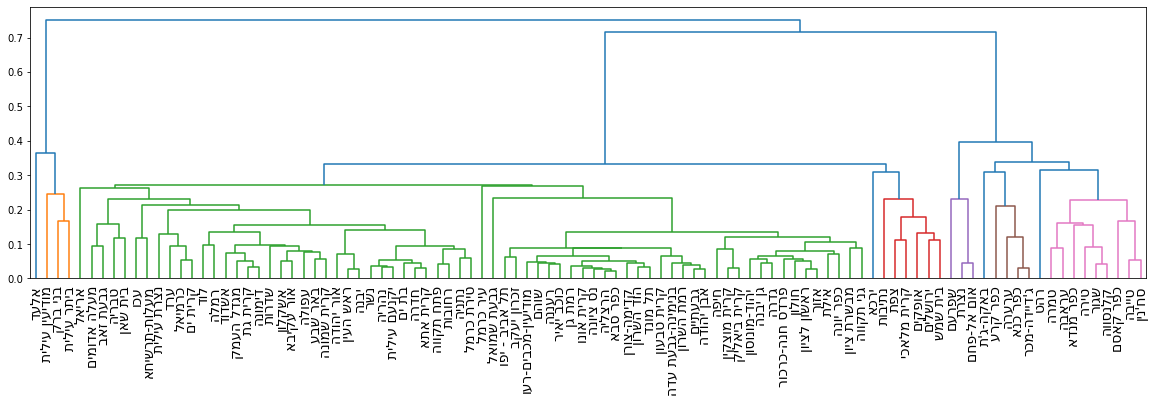

In [17]:
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.3); #color_threshold is where we "cut" the dendrogram. 

## Challenge 1.2 (_max score - 30 points_)
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

The guiding line:
1. We want to cluster parties (for example, left or right winged). Adjust the matrix accordingly.
2. You can change the max number of cities (100 is set now) or the normalization technique.
3. We do not expect to have exact coalition proposed by this technique, however, explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

In [18]:
from sklearn.preprocessing import normalize, StandardScaler

In [19]:
parties = df[party_names]
# parties = parties.transpose()


In [20]:
parties_300 = parties[:300]
parties_200 = parties[:200]
parties_150 = parties[:150]
parties_100 = parties[:100]

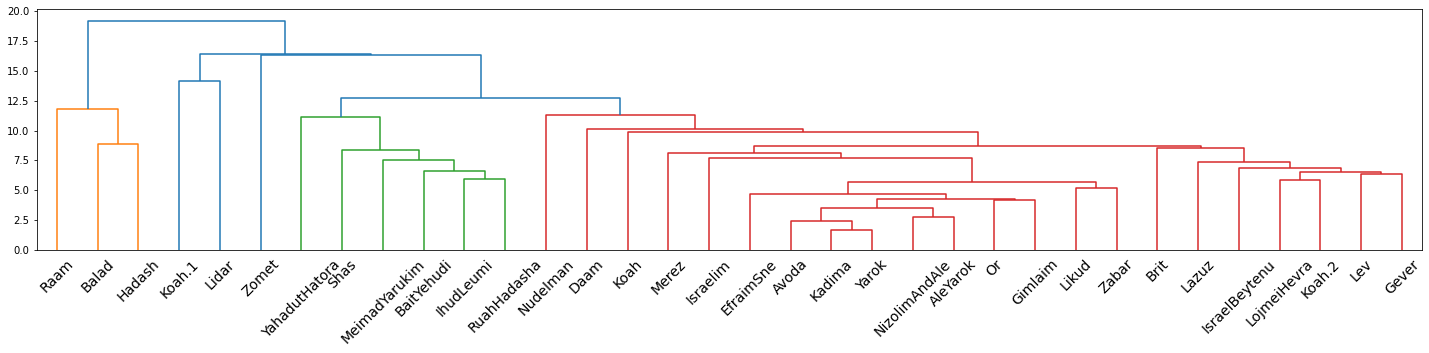

In [21]:
lnk = hierarchy.linkage(StandardScaler().fit_transform(parties_200).transpose(), 'average') #Changed cities to 200
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels = party_names, leaf_font_size=14, color_threshold=12.4); #color_threshold is where we "cut" the dendrogram. 
plt.tight_layout()

When increasing the city count to 200, to improve our sample size, we see that the dendrogram splits the parties very well on their religous/ethnical lines: Secular (red), Jewish-Orthodox (green), and arab (yellow). The unclassified are in blue- these are parties which are outliers to party lines.

The dendrogram detected the religious split, as opposed to general coalition splits, because the data is based off of voting by city. Religious groupings by city are more polar than general 'left' or 'right' political affiliation. Meaning, arab cities, as well as Jewish cities, tend to be more heteregenous. The hierarchal clustering detects these dense voting populations well, as the voting in those cities tends to be uniform. 

On the contrary, even a city which leans left will have a variety of a population, and even political agenda which is non uniform- hierarchal clustering can't find patterns through this.

## Part 2 - DBSCAN


In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [22]:
# auxilary plotting functions
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import DBSCAN

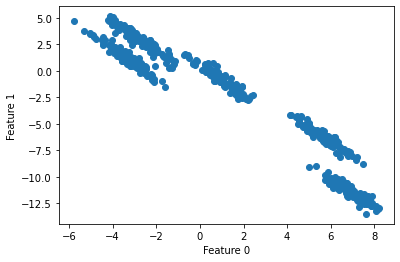

In [23]:
# generate some random cluster data
X_old, y_old = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X_old= np.dot(X_old, transformation)

plot(X_old)

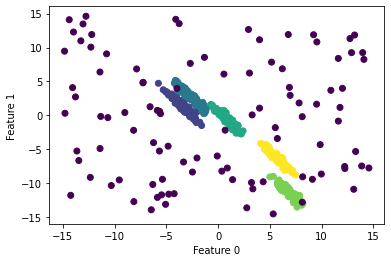

In [24]:
# Adding Noise to data
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = pd.DataFrame(np.concatenate([X_old, outliers]))
y = pd.DataFrame(np.concatenate([y_old, [-1]*len(outliers)])) #-1 are the outliers.
plot(X.values,y)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

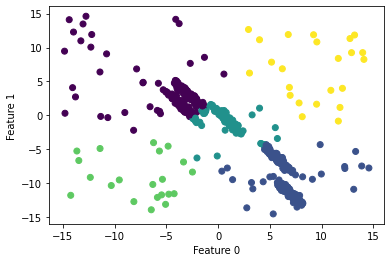

In [25]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

plot(X.values,kmeans_clusters)

In [26]:
kmeans.verbose

0

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1 (_max score - 30 points_)

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the adjusted rand index value. For that, you paid some amount of money and had some guys labled 50 points for you. The indices of the labeled samples you are allowed to use are in the next cell.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



In [27]:
np.random.seed(0)
labeled_samples = np.random.choice(601,50,replace=False)
y.iloc[labeled_samples,0].head(10)

596   -1
52     1
190    1
165    4
344    4
342    3
441    0
406    4
389    4
243    4
Name: 0, dtype: int32

a) Create array of possible e values, and plot the best one:

0.7801802170145395
1.2562626262626264


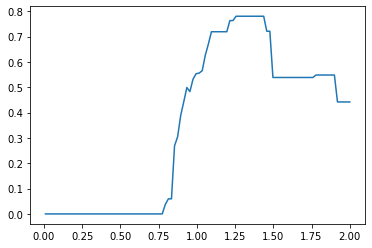

In [28]:
from sklearn.metrics import adjusted_rand_score
minPts = 50

scores = []
eps_range_50 = np.linspace(0.01, 2, 100)
for eps in eps_range_50:
    clustering = DBSCAN(eps = eps, min_samples=minPts)
    
    pred =clustering.fit_predict(X)
    scores.append(adjusted_rand_score(np.array(y.values).flatten()[labeled_samples], pred[labeled_samples]))
plt.plot(eps_range_50, scores)

print(np.max(scores))
print(eps_range_50[np.argmax(scores)])

b) Visualize the results of the best one

Text(0, 0.5, 'Feature 1')

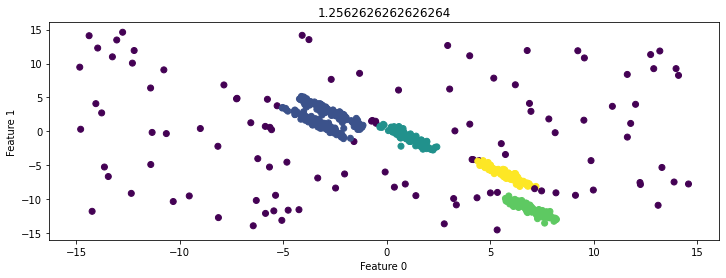

In [29]:
fig = plt.figure(figsize=(12,4))

clustering = DBSCAN(eps = eps_range_50[np.argmax(scores)], min_samples=minPts)
plt.scatter(X.values[:, 0], X.values[:, 1], c=clustering.fit(X).labels_)    
plt.title(eps_range_50[np.argmax(scores)])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

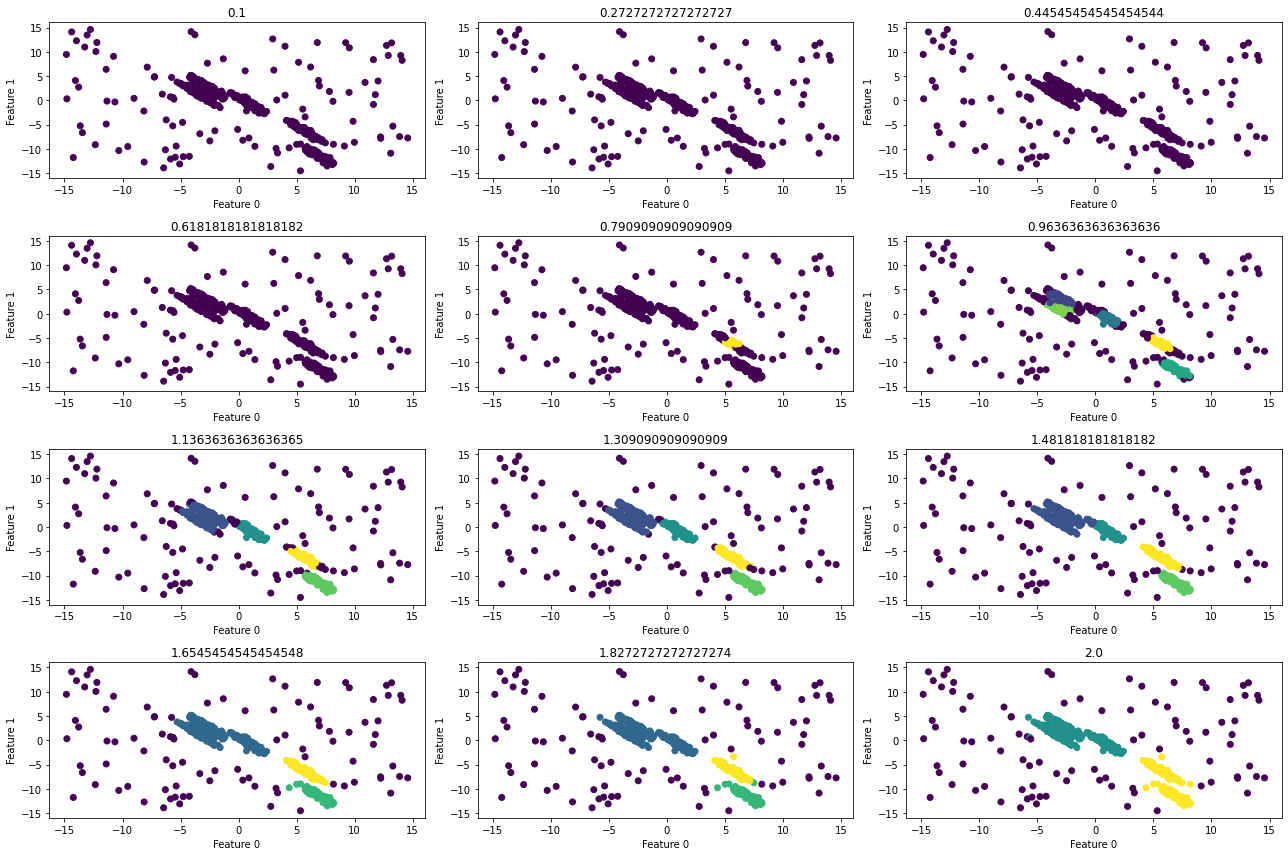

In [30]:
minPts = 50 #Workbook said to do minpoints at 50. Putting 4 gives much better results
eps_range = np.linspace(0.1,2, 12)

# fig = plt.figure(figsize=(12,6))
fig = plt.figure(figsize=(18,12))

for i, eps in enumerate(eps_range):
    plt.subplot(4,3, i+1)
    clustering = DBSCAN(eps = eps, min_samples=minPts)
    plt.scatter(X.values[:, 0], X.values[:, 1], c=clustering.fit(X).labels_)    
    plt.title(eps)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
plt.tight_layout()

How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

Answers are expected in a textual form

Answer: A way to narrow down the range of search for the optimal epsilon value, could be to use k nearest nieghbors. We would caluculate the distance to the nearest n points for each point, sorting and plotting the results. Then we look for the elbow of the plot, and any other pronounced changes- from these two points, we could create a  range of epsilon values.

In [31]:
# from sklearn.neighbors import NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=50)
# nbrs = neigh.fit(X)
# distances, indices = nbrs.kneighbors(X)

# distances = np.sort(distances, axis = 0)
# distances = distances[:, 1] #(only care for the second column, first column is just 0's)
# from scipy.signal import savgol_filter #Can help us to smooth the plot
# distances = savgol_filter(distances, 21, 1) # Smooth the data
# plt.plot(distances)

## Challenge 2.2 (_max score - 20 points_)


Support yout findings by plotting the Purity score.
Implement the purity score and print the score for the best epsilon you have found.
Print the results for:
1. The small labeled set you were given
2. The rest of the data (not including the set from 1)
3. The whole data together

Are we overfitting?

In [32]:
import numpy as np
from sklearn.metrics.cluster import contingency_matrix

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    CM = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(CM, axis=0)) / np.sum(CM) 

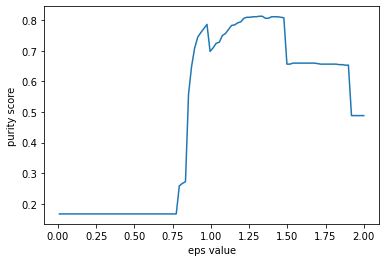

In [33]:
purity_scores = []
for eps in eps_range_50:
    clustering = DBSCAN(eps = eps, min_samples=minPts)
    purity = purity_score(y, clustering.fit(X).labels_)
    purity_scores.append(purity)
    plt.xlabel('eps value')
    plt.ylabel('purity score')
plt.plot(eps_range_50, purity_scores)


In [34]:
print('eps with best purity: ', eps_range_50[np.argmax(purity_scores)])
print('eps with best rand_index score: ', eps_range_50[np.argmax(scores)])

eps with best purity:  1.3165656565656567
eps with best rand_index score:  1.2562626262626264


#### Max purity Score by various sample sets:

In [35]:
purity_eps = eps_range_50[np.argmax(purity_scores)]
purity_score = DBSCAN(eps = purity_eps, min_samples = minPts)
prediction = purity_score.fit_predict(X)

Text(0.5, 1.0, 'Actual values')

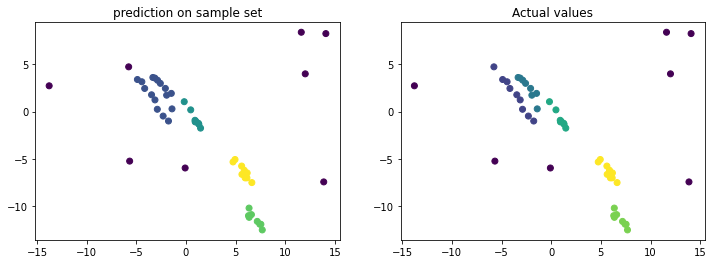

In [36]:
fig = plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.scatter(X.iloc[labeled_samples].values[:,0], X.iloc[labeled_samples].values[:,1], c = prediction[labeled_samples] )
plt.title('prediction on sample set')

plt.subplot(1,2,2)
plt.scatter(X.iloc[labeled_samples].values[:,0], X.iloc[labeled_samples].values[:,1], c = y.iloc[labeled_samples])
plt.title('Actual values')

Text(0.5, 1.0, 'Actual values')

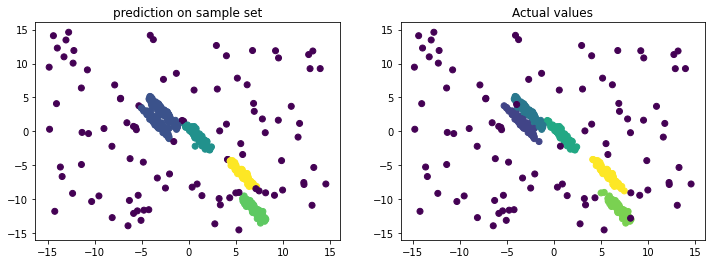

In [37]:
other_than_samp = X.drop(labeled_samples).index
fig = plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.scatter(X.iloc[other_than_samp].values[:,0], X.iloc[other_than_samp].values[:,1], c = prediction[other_than_samp] )
plt.title('prediction on sample set')

plt.subplot(1,2,2)
plt.scatter(X.iloc[other_than_samp].values[:,0], X.iloc[other_than_samp].values[:,1], c = y.iloc[other_than_samp])
plt.title('Actual values')

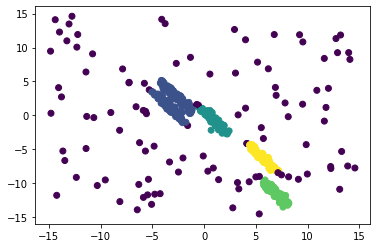

In [38]:
plt.scatter(X.values[:, 0], X.values[:, 1], c=prediction)    

Our model is not overfitted. With minPts = 50, we in fact are underfitting the clusters, as even the best purity score and rand index do not succeed in fully detecting one of the clusters.




# Good Luck and Enjoy Learning Machine Learning!

